Understanding the objective:

> Which schools have students that would benefit from outreach services and lead to a more diverse group of students taking the SHSAT and being accepted into New York City's Specialized High Schools.
                                                            - Chris Crawford, Kaggle Team

 

> Only a third (roughly) of eligible students take the SHSAT, and our goal is to drive more test takers (you can't get in if you don't sit for the test!). The education space is full of non-profits like ours with limited resources. So the research question is, given limited resources, where (at which schools) can you target your intervention efforts to make an impact on those participation numbers. The hypothesis is that using what we know about students/schools who do take the test, we can find similar students/schools and rank them on their likelihood/opportunity of converting into test-takers
                                                             - Max B, Dataset Creator



*Submissions for the Main Prize Track will be judged based on the following general criteria:*
* Performance - How well does the solution match schools and the needs of students to PASSNYC services? PASSNYC will not be able to live test every submission, so a strong entry will clearly articulate why it is effective at tackling the problem.
* Influential - The PASSNYC team wants to put the winning submissions to work quickly. Therefore a good entry will be easy to understand and will enable PASSNYC to convince stakeholders where services are needed the most.
* Shareable - PASSNYC works with over 60 partner organizations to offer services such as test preparation, tutoring, mentoring, extracurricular programs, educational consultants, community and student groups, trade associations, and more. Winning submissions will be able to provide convincing insights to a wide subset of these organizations. 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools

In [2]:
def percent_to_int(df_in):
    for col in df_in.columns.values:
        if col.startswith("Percent") or col.endswith("%") or col.endswith("Rate"):
            df_in[col] = df_in[col].astype(np.object).str.replace('%', '').astype(float)
    return df_in

In [3]:
# Preprocessing
df_schools_raw = pd.read_csv('../../../input/2016 School Explorer.csv')
df_schools_raw = df_schools_raw[df_schools_raw['Grade High'] != '0K'] # If school just kas ok, might as well drop
df_schools_raw = percent_to_int(df_schools_raw)
df_schools_raw['School Income Estimate'] = df_schools_raw['School Income Estimate'].astype(np.object).str.replace('$', '').str.replace(',', '').str.replace('.', '').astype(float)
df_schools_raw.replace(np.NaN,0, inplace=True)

# Dataset 2: Admissions information
df = pd.read_csv('../../../input/2017-2018 SHSAT Admissions Test Offers By Sending School.csv')
df = percent_to_int(df)
df.replace(np.NaN,0, inplace=True)
print("We have admission information for {} schools".format(df.shape[0]))

We have admission information for 589 schools


In [4]:
df.drop(['Borough','School Category','School Name'], axis=1, inplace=True)
dfmerged = pd.merge(df_schools_raw, df, how='outer', left_on='Location Code' ,right_on='School DBN')
dfmerged.dropna(inplace=True)
print("We have admission information for {} schools".format(dfmerged.shape[0]))


# For SHSAT, if school has just grades below 5, no point in using those 
df_incorrect = dfmerged[dfmerged['Grade High'].astype(int) <= 5]
print("We have %d schools with Grade High field 5 and SHSAT results"%(df_incorrect.shape[0]))

len(set(df_schools_raw[df_schools_raw['Grade High'].astype(int)>7]['Location Code'].values) - set(df['School DBN'].values))

We have admission information for 579 schools
We have 20 schools with Grade High field 5 and SHSAT results


40

Text(0,0.5,u'Number of students who took test')

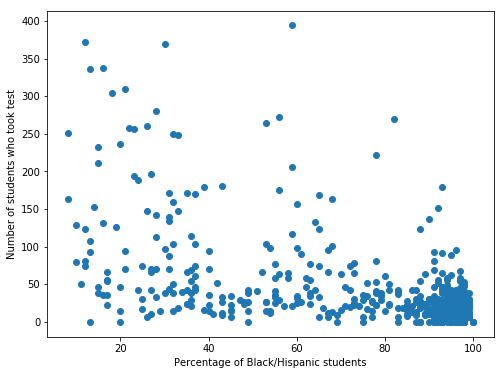

In [5]:
plt.figure(figsize=[8,6])
plt.scatter(df['Percentage of Black/Hispanic students'], df['Number of students who took test'])
plt.xlabel('Percentage of Black/Hispanic students')
plt.ylabel('Number of students who took test')

In [6]:
dfshort = dfmerged[dfmerged['Percentage of Black/Hispanic students']>80]
dfshort = dfshort[dfshort['Number of students who took test']<50]

In [127]:
dfmerged_black = dfmerged[dfmerged['Percent Black / Hispanic'] < 50]

(array([35., 31., 12., 11.,  8.,  4.,  8.,  1.,  2.,  4.]),
 array([  0. ,  37.2,  74.4, 111.6, 148.8, 186. , 223.2, 260.4, 297.6,
        334.8, 372. ]),
 <a list of 10 Patch objects>)

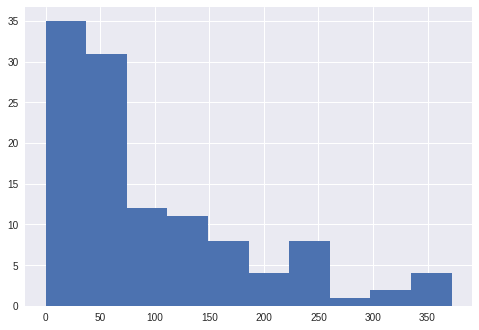

In [128]:
plt.hist(dfmerged_black['Number of students who took test'])

In [173]:
def grade_minority_percent_4s (df, grade, subject):
    out_field = ('Grade %d %s Minority 4s')%(grade, subject)
    num1 = ('Grade %d %s 4s - Black or African American')%(grade, subject)
    num2 = ('Grade %d %s 4s - Hispanic or Latino')%(grade, subject)
    den = ('Grade %d %s 4s - All Students')%(grade, subject)
    df = df[df[den].astype(int)>7]
    df[out_field] = (df[num1] + df[num2])/(df[den])
    grade_minority_df = df[df[out_field]>0.7]
    print(grade, subject, df.shape, grade_minority_df.shape, (grade_minority_df[num1] + grade_minority_df[num2]).mean(), df[num1].mean(), df[num2].mean())
    return df

In [8]:
elite_schools_df = pd.read_csv('../../../input/elite_eight_data.csv')

In [10]:
elite_schools_df = elite_schools_df.iloc[:8]

In [14]:
elite_schools_df.columns

Index([u'School Name', u'Lat', u' Long', u'Address', u'Enrollment'], dtype='object')

In [17]:
import seaborn as sns

Text(0.5,0,u'Longitude')

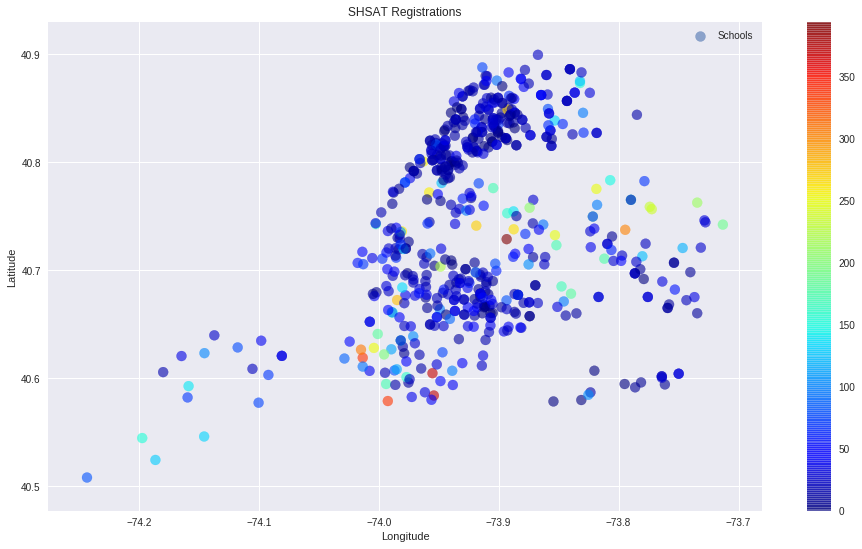

In [83]:
fig, ax = plt.subplots(figsize=(16,9))
ax = dfmerged.plot(kind="scatter", x="Longitude", y="Latitude", 
                   c=dfmerged['Number of students who took test'],s=100, cmap=plt.get_cmap("jet"), 
                   label='Schools', title='SHSAT Registrations', 
                   colorbar=True, alpha=0.6, ax=ax)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

(40.5, 40.95)

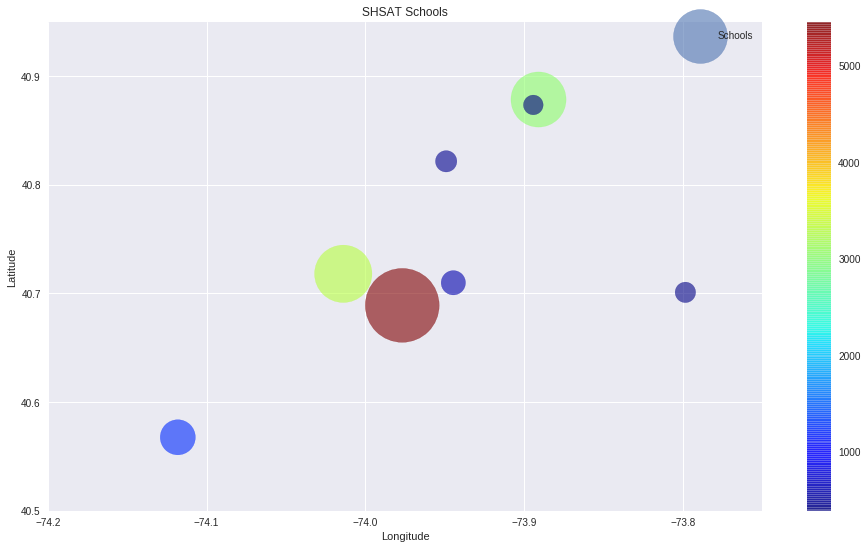

In [33]:
fig, ax = plt.subplots(figsize=(16,9))
ax = elite_schools_df.plot(kind="scatter", x=" Long", y="Lat", 
                   c=elite_schools_df['Enrollment'], s=elite_schools_df['Enrollment'], cmap=plt.get_cmap("jet"), 
                   label='Schools', title='SHSAT Schools', 
                   colorbar=True, alpha=0.6, ax=ax)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_xlim(-74.2, -73.75)
ax.set_ylim(40.5, 40.95)

In [175]:
more_registered_df = dfmerged[dfmerged['Number of students who took test'] > 50]
less_registered_students_df = dfmerged[dfmerged['Number of students who took test'] < 10]

In [176]:
more_registered_geofilter_df = more_registered_df[np.logical_and(more_registered_df['Latitude'] > 40.5, more_registered_df['Latitude'] < 40.9)]
more_registered_geofilter_df = more_registered_geofilter_df[np.logical_and(more_registered_geofilter_df['Longitude'] > -74.2, more_registered_geofilter_df['Longitude'] < -73.8)]

less_registered_geofilter_df = less_registered_students_df[np.logical_and(less_registered_students_df['Latitude'] > 40.5, less_registered_students_df['Latitude'] < 40.9)]
less_registered_geofilter_df = less_registered_geofilter_df[np.logical_and(less_registered_geofilter_df['Longitude'] > -74.2, less_registered_geofilter_df['Longitude'] < -73.8)]

In [183]:
geofilter_minority_4s_math = grade_minority_percent_4s(more_registered_geofilter_df, 8, 'Math')
geofilter_minority_4s_ela = grade_minority_percent_4s(more_registered_geofilter_df, 8, 'ELA')

(8, 'Math', (67, 167), (7, 167), 31.857142857142858, 3.537313432835821, 8.507462686567164)
(8, 'ELA', (110, 167), (17, 167), 21.176470588235293, 3.9, 9.427272727272728)


/home/prathmesh/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [180]:
geofilter_minority_4s_math = grade_minority_percent_4s(less_registered_geofilter_df, 8, 'Math')
geofilter_minority_4s_ela = grade_minority_percent_4s(less_registered_geofilter_df, 8, 'ELA')

(8, 'Math', (4, 167), (3, 167), 12.0, 1.5, 7.5)
(8, 'ELA', (3, 167), (3, 167), 9.0, 0.6666666666666666, 8.333333333333334)


/home/prathmesh/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5,0,u'Longitude')

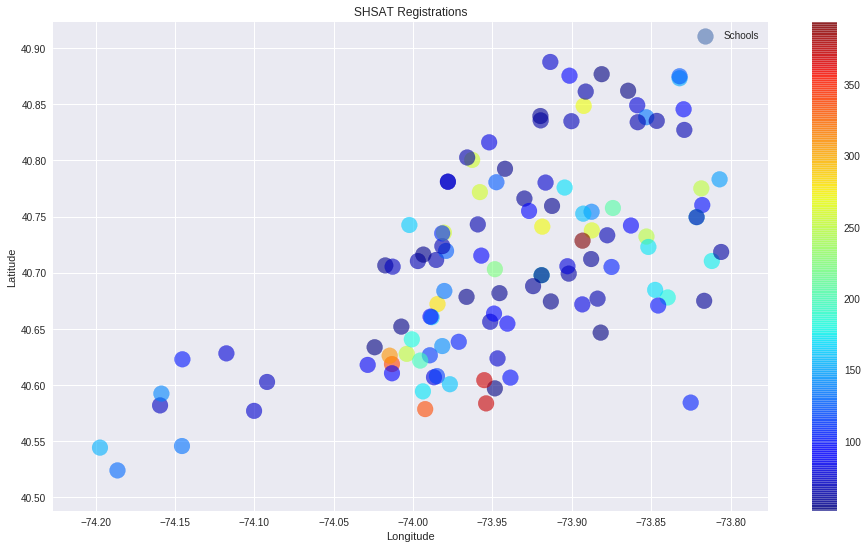

In [181]:
fig, ax = plt.subplots(figsize=(16,9))
ax = more_registered_geofilter_df.plot(kind="scatter", x="Longitude", y="Latitude", 
                   c=more_registered_geofilter_df['Number of students who took test'], s=250, cmap=plt.get_cmap("jet"), 
                   label='Schools', title='SHSAT Registrations', 
                   colorbar=True, alpha=0.6, ax=ax)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
# ax.set_xlim(-74.2, -73.75)
# ax.set_ylim(40.5, 40.95)

(40.5, 40.95)

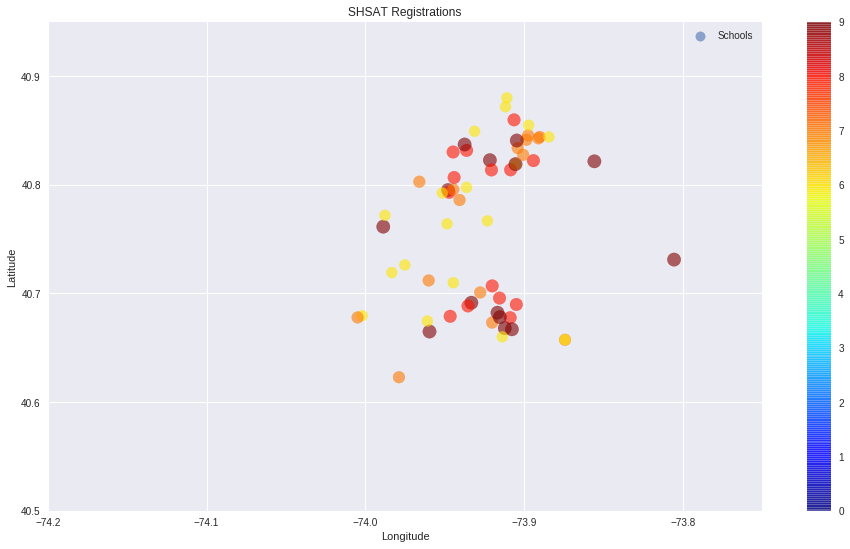

In [182]:
fig, ax = plt.subplots(figsize=(16,9))
ax = less_registered_geofilter_df.plot(kind="scatter", x="Longitude", y="Latitude", 
                   c=less_registered_geofilter_df['Number of students who took test'], s=less_registered_geofilter_df['Number of students who took test']*20, cmap=plt.get_cmap("jet"), 
                   label='Schools', title='SHSAT Registrations', 
                   colorbar=True, alpha=0.6, ax=ax)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_xlim(-74.2, -73.75)
ax.set_ylim(40.5, 40.95)

In [77]:
less_registered_geofilter_df['Percent Black / Hispanic'].describe()

count    103.000000
mean      90.941748
std       16.138388
min       11.000000
25%       93.000000
50%       96.000000
75%       98.000000
max      100.000000
Name: Percent Black / Hispanic, dtype: float64

In [137]:
geofilter_df['Percent Black / Hispanic'].describe()

count    52.000000
mean     39.903846
std      24.169548
min       7.000000
25%      24.500000
50%      32.500000
75%      55.500000
max      93.000000
Name: Percent Black / Hispanic, dtype: float64

## As we can see that, the geofilter df comes from the dfmerged new and it represents the schools which have higher registrations. So, if we compare the means of the percent of black / hispanic for less registered and more registered schools, we see a great difference, which eventually leads to a conclusion that the schools having black / hispanic population higher are not registering for the test. If we plot these schools on NYC map, we find that these schools are nearby the SHSAT (elite) schools too. Hence, if PASSNYC helps these schools (how??), it might lead to increase in registrations. 

### To answer how : Look at the ENI, SPI and School income for these schools and then again we can map these to resource centers. 